# The Problem
This notebook demonstrates how to use PyTorch to solve a multiple linear regression problem, where the goal is to predict the median house value in California districts based on several input features. Linear regression models the relationship between these features and the target price as a linear combination, making it one of the simplest yet fundamental machine learning techniques.

# The Dataset
We use the California Housing dataset, a standard regression benchmark containing around 20,000 samples with 8 input features per district, such as median income, house age, and location coordinates. The target variable is the median house price, measured in hundreds of thousands of dollars. This dataset provides enough complexity to showcase the power and limitations of linear models.

# Converting to Tensors
After splitting the dataset into training and test sets and scaling the features, we convert the data into PyTorch tensors. Tensors are multidimensional arrays that PyTorch uses for computations, enabling automatic differentiation and GPU acceleration. Both inputs and targets are converted to floating-point tensors to be compatible with the PyTorch model and loss functions.

In [8]:
# Pure Linear Regression with PyTorch on California Housing Dataset

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select a single feature (e.g., MedInc)
X_train_single_feature = X_train[:, 0].reshape(-1, 1)
X_test_single_feature = X_test[:, 0].reshape(-1, 1)

# Scale features
scaler = StandardScaler()
X_train_single_feature = scaler.fit_transform(X_train_single_feature)
X_test_single_feature = scaler.transform(X_test_single_feature)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_single_feature, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_single_feature, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

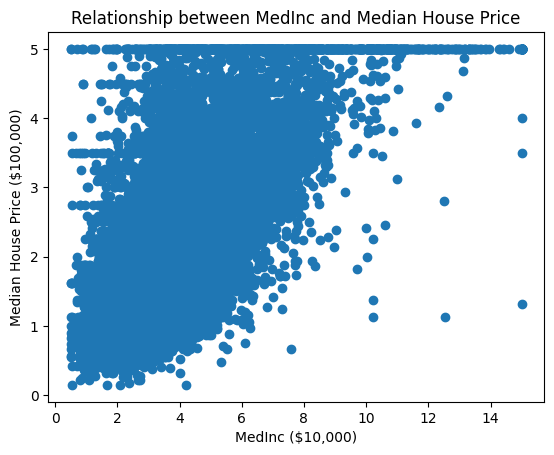

In [9]:
plt.scatter(X[:, 0], y)
plt.xlabel('MedInc ($10,000)')
plt.ylabel('Median House Price ($100,000)')
plt.title('Relationship between MedInc and Median House Price')
plt.show()

# Simple Linear Regression Model, MSE Loss, and SGD Optimizer
The model consists of a single linear layer (nn.Linear) that directly maps the 8 input features to the output median house price. The loss function is Mean Squared Error (MSE), which quantifies the average squared difference between predicted and actual prices. The optimizer used is Stochastic Gradient Descent (SGD), a classic gradient-based optimization algorithm, which iteratively adjusts the model weights to minimize the loss.

In [10]:
# Define linear regression model (single layer)
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training for 100 Epochs
The model is trained for 100 full passes over the training data. During each epoch, the model predicts prices, computes the loss, backpropagates the error, and updates its weights using the optimizer. This iterative process helps the model gradually learn the best linear coefficients that relate the features to the target house prices. The training loss is recorded to monitor learning progress.

In [11]:
# Training loop
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 11.4415
Epoch 10, Loss: 7.8708
Epoch 20, Loss: 5.4870
Epoch 30, Loss: 3.8956
Epoch 40, Loss: 2.8331
Epoch 50, Loss: 2.1238
Epoch 60, Loss: 1.6503
Epoch 70, Loss: 1.3341
Epoch 80, Loss: 1.1231
Epoch 90, Loss: 0.9821


/home/mtrottie/code/RecommenderSystems/.env/lib/python3.12/site-packages/torch/autograd/graph.py:824: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


# Evaluation
After training, the model’s performance is evaluated on unseen test data using the Mean Squared Error (MSE) and R² score metrics. MSE measures the average squared prediction error, while R² indicates how well the model explains variance in the data. Additionally, a scatter plot compares predicted vs. actual house values, where points lying near the diagonal line indicate accurate predictions.

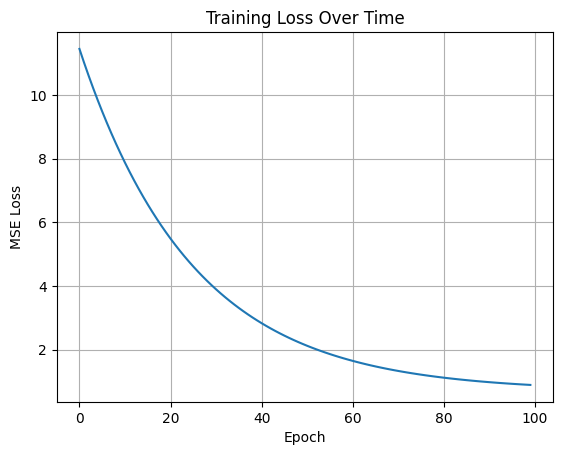

Test MSE: 0.8908 (Lower is better — average squared prediction error)
Test R^2 Score: 0.3202 (Proportion of variance explained; closer to 1 is better)

Model learned weights (one per feature):
  MedInc: 0.5951
Model learned bias (intercept): 1.6878

Interpretation:
- Each weight shows how much the median house price changes (in scaled units) when that feature increases by one standard deviation.
- The bias is the predicted house price when all features are zero (scaled).


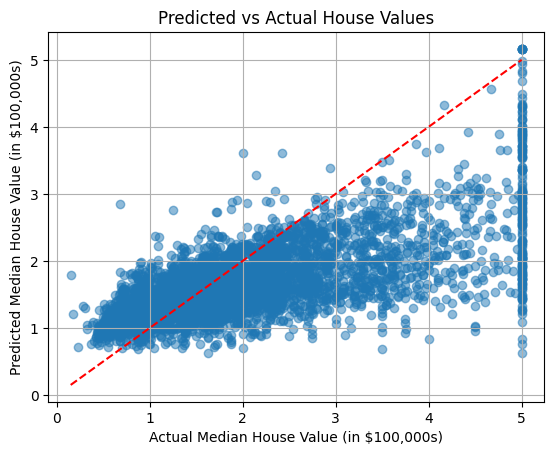

Points close to the red line indicate good predictions.
Points far from the line indicate where the model's predictions differ from actual values.
This simple linear regression model uses all features linearly to predict house prices.
To improve accuracy, consider adding nonlinearities or more complex models.


In [12]:
# Plot training loss over epochs
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

# Evaluate model performance on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

print(f"Test MSE: {mse:.4f} (Lower is better — average squared prediction error)")
print(f"Test R^2 Score: {r2:.4f} (Proportion of variance explained; closer to 1 is better)")

# Extract learned parameters (weights and bias)
weights = model.weight.detach().numpy().flatten()
bias = model.bias.item()

# Feature names - update this list if your features differ
feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

print("\nModel learned weights (one per feature):")
for name, w in zip(feature_names, weights):
    print(f"  {name}: {w:.4f}")
print(f"Model learned bias (intercept): {bias:.4f}")

print("\nInterpretation:")
print(f"- Each weight shows how much the median house price changes (in scaled units) when that feature increases by one standard deviation.")
print(f"- The bias is the predicted house price when all features are zero (scaled).")

# Plot predicted vs actual house prices
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value (in $100,000s)')
plt.ylabel('Predicted Median House Value (in $100,000s)')
plt.title('Predicted vs Actual House Values')
plt.grid(True)
plt.show()

print("Points close to the red line indicate good predictions.")
print("Points far from the line indicate where the model's predictions differ from actual values.")
print("This simple linear regression model uses all features linearly to predict house prices.")
print("To improve accuracy, consider adding nonlinearities or more complex models.")


In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

model.eval()

output = widgets.Output()
slider = widgets.IntSlider(min=0, max=len(X_test_tensor)-1, step=1, description='Sample Index')

def plot_prediction(idx):
    with torch.no_grad():
        input_sample = X_test_tensor[idx].unsqueeze(0)
        pred = model(input_sample).item()
        actual = y_test_tensor[idx].item()

    with output:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(6,4))
        ax.scatter([actual], [pred], color='blue', label='Prediction')
        ax.plot([0, max(y_test)*1.1], [0, max(y_test)*1.1], 'r--', label='Ideal: Predicted = Actual')
        ax.set_xlim(0, max(y_test)*1.1)
        ax.set_ylim(0, max(y_test)*1.1)
        ax.set_xlabel('Actual Median House Value (in $100,000s)')
        ax.set_ylabel('Predicted Median House Value (in $100,000s)')
        ax.set_title(f'Prediction for Sample Index {idx}')
        ax.legend()
        plt.grid(True)
        plt.show()
        print(f"Predicted Price: ${pred * 100000:.2f}")
        print(f"Actual Price:    ${actual * 100000:.2f}")

def on_slider_change(change):
    plot_prediction(change['new'])

slider.observe(on_slider_change, names='value')

display(slider, output)
plot_prediction(0)


IntSlider(value=0, description='Sample Index', max=4127)

Output()

In [14]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import torch
import numpy as np

# Calculate the mean and standard deviation of MedInc
mean_medinc = X_train[:, 0].mean()
std_medinc = X_train[:, 0].std()

# Define the slider for MedInc
slider = widgets.FloatSlider(
    value=5,
    min=0,
    max=15,
    step=0.1,
    description='MedInc ($10,000)',
    continuous_update=True,
    layout=widgets.Layout(width='90%'),
    style={'description_width': '150px'}
)

output = widgets.Output()

# Define the function to predict house value
def predict_house_value(change=None):
    medinc = np.array([[(slider.value - mean_medinc) / std_medinc]])
    model.eval()
    with torch.no_grad():
        pred = model(torch.tensor(medinc, dtype=torch.float32)).item()
    with output:
        clear_output(wait=True)
        print(f"Predicted Median House Price: ${pred * 100000:,.2f}")

# Observe slider changes to update prediction
slider.observe(predict_house_value, names='value')

# Display the slider and output
display(slider)
display(output)

# Initial prediction
predict_house_value()

FloatSlider(value=5.0, description='MedInc ($10,000)', layout=Layout(width='90%'), max=15.0, style=SliderStyle…

Output()